In [2]:
import PIL

In [3]:
print('Pillow Version:', PIL.__version__)

Pillow Version: 5.1.0


In [4]:
from PIL import Image

In [5]:
import os
import glob
cat=[]
path = "D:/TransferLearningDemo/images/cat/"
rePath = "D:/TransferLearningDemo/images/reCat/"
for file in os.listdir(path):
    image = Image.open(path+file)
    image = image.convert('L')
    img_resized = image.resize((128,128))
    l=file.split(".")
    cat.append(rePath+l[0]+l[1]+".jpg")
    img_resized.save(rePath+l[0]+l[1]+".jpg", 'JPEG')

In [6]:
cat[:5]

['D:/TransferLearningDemo/images/reCat/cat0.jpg',
 'D:/TransferLearningDemo/images/reCat/cat1.jpg',
 'D:/TransferLearningDemo/images/reCat/cat10.jpg',
 'D:/TransferLearningDemo/images/reCat/cat100.jpg',
 'D:/TransferLearningDemo/images/reCat/cat101.jpg']

In [7]:
path = "D:/TransferLearningDemo/images/dog/"
rePath = "D:/TransferLearningDemo/images/reDog/"
dog=[]
for file in os.listdir(path):
    image = Image.open(path+file)
    image = image.convert('L') # convert image to black and white
    img_resized = image.resize((128,128))
    l=file.split(".")
    dog.append(rePath+l[0]+l[1]+".jpg")
    img_resized.save(rePath+l[0]+l[1]+".jpg", 'JPEG')

In [8]:
dog[:5]

['D:/TransferLearningDemo/images/reDog/dog0.jpg',
 'D:/TransferLearningDemo/images/reDog/dog1.jpg',
 'D:/TransferLearningDemo/images/reDog/dog10.jpg',
 'D:/TransferLearningDemo/images/reDog/dog100.jpg',
 'D:/TransferLearningDemo/images/reDog/dog101.jpg']

In [9]:
data = cat+dog

In [10]:
print(data[0])
print(data[1998])

D:/TransferLearningDemo/images/reCat/cat0.jpg
D:/TransferLearningDemo/images/reDog/dog998.jpg


In [11]:
import random 
random.shuffle(data)

In [12]:
data[0]

'D:/TransferLearningDemo/images/reDog/dog97.jpg'

In [13]:
data[18]

'D:/TransferLearningDemo/images/reDog/dog231.jpg'

In [14]:
data[1998]

'D:/TransferLearningDemo/images/reCat/cat529.jpg'

In [ ]:
len(data)

In [15]:
train = data[:1500]

In [16]:
len(train)

1500

In [17]:
test = data[1500:]

In [18]:
len(test)

500

In [19]:
def splitXandY(f):
    X=[]
    y=[]
    for i in f:
        X.append(i)
        if "cat" in i:
            y.append(0)
        elif "dog" in i:
            y.append(1)
    return X,y

In [20]:
test

['D:/TransferLearningDemo/images/reDog/dog849.jpg',
 'D:/TransferLearningDemo/images/reCat/cat19.jpg',
 'D:/TransferLearningDemo/images/reCat/cat952.jpg',
 'D:/TransferLearningDemo/images/reDog/dog436.jpg',
 'D:/TransferLearningDemo/images/reDog/dog770.jpg',
 'D:/TransferLearningDemo/images/reDog/dog565.jpg',
 'D:/TransferLearningDemo/images/reCat/cat486.jpg',
 'D:/TransferLearningDemo/images/reCat/cat90.jpg',
 'D:/TransferLearningDemo/images/reDog/dog950.jpg',
 'D:/TransferLearningDemo/images/reCat/cat256.jpg',
 'D:/TransferLearningDemo/images/reCat/cat751.jpg',
 'D:/TransferLearningDemo/images/reCat/cat171.jpg',
 'D:/TransferLearningDemo/images/reDog/dog541.jpg',
 'D:/TransferLearningDemo/images/reDog/dog867.jpg',
 'D:/TransferLearningDemo/images/reDog/dog1.jpg',
 'D:/TransferLearningDemo/images/reDog/dog300.jpg',
 'D:/TransferLearningDemo/images/reDog/dog730.jpg',
 'D:/TransferLearningDemo/images/reDog/dog590.jpg',
 'D:/TransferLearningDemo/images/reDog/dog611.jpg',
 'D:/TransferLea

In [21]:
X_test,y_test = splitXandY(test)

In [22]:
print(X_test[:6])
print(y_test[:6])

['D:/TransferLearningDemo/images/reDog/dog849.jpg', 'D:/TransferLearningDemo/images/reCat/cat19.jpg', 'D:/TransferLearningDemo/images/reCat/cat952.jpg', 'D:/TransferLearningDemo/images/reDog/dog436.jpg', 'D:/TransferLearningDemo/images/reDog/dog770.jpg', 'D:/TransferLearningDemo/images/reDog/dog565.jpg']
[1, 0, 0, 1, 1, 1]


In [23]:
X_train,y_train = splitXandY(train)

In [24]:
print(X_train[:6])
print(y_train[:6])

['D:/TransferLearningDemo/images/reDog/dog97.jpg', 'D:/TransferLearningDemo/images/reDog/dog246.jpg', 'D:/TransferLearningDemo/images/reDog/dog903.jpg', 'D:/TransferLearningDemo/images/reDog/dog203.jpg', 'D:/TransferLearningDemo/images/reCat/cat190.jpg', 'D:/TransferLearningDemo/images/reDog/dog799.jpg']
[1, 1, 1, 1, 0, 1]


In [25]:
import numpy as np

In [26]:
def load_image(infilename):
    img = Image.open(infilename)
    img.load()
    data = np.asarray(img,dtype="int32")
    return data/255.0

In [27]:
X_train  = [load_image(i) for i in X_train]

In [28]:
X_train[0]

array([[0.4       , 0.3372549 , 0.33333333, ..., 0.9372549 , 0.87058824,
        0.91764706],
       [0.41960784, 0.41568627, 0.45882353, ..., 0.98823529, 0.94117647,
        0.85490196],
       [0.16078431, 0.2       , 0.31372549, ..., 0.84313725, 0.70980392,
        0.28627451],
       ...,
       [0.45882353, 0.41568627, 0.48235294, ..., 0.62745098, 0.68627451,
        0.74509804],
       [0.47843137, 0.34117647, 0.41176471, ..., 0.59215686, 0.63921569,
        0.75294118],
       [0.49803922, 0.38039216, 0.52156863, ..., 0.63921569, 0.70196078,
        0.55294118]])

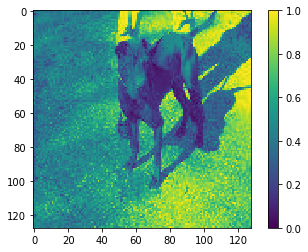

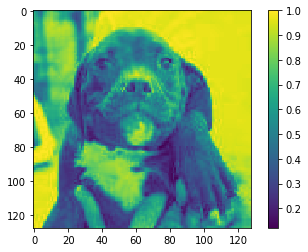

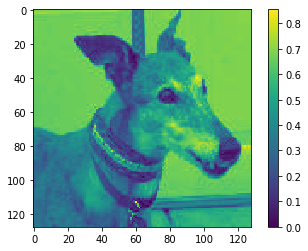

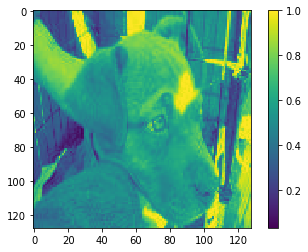

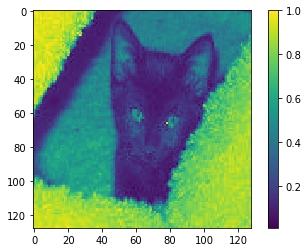

In [29]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
for i in X_train[:5]:
    plt.figure()
    plt.imshow(i)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [30]:
X_test  = [load_image(i) for i in X_test]

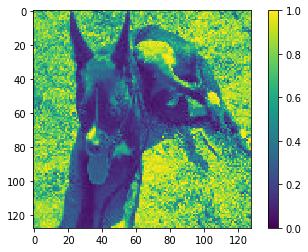

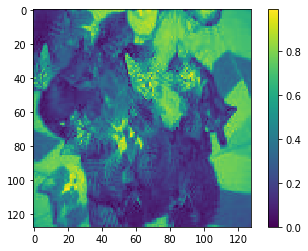

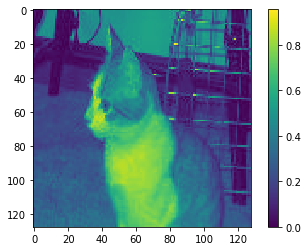

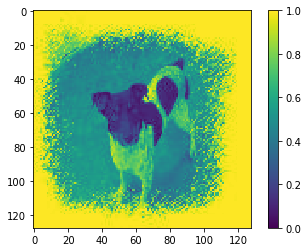

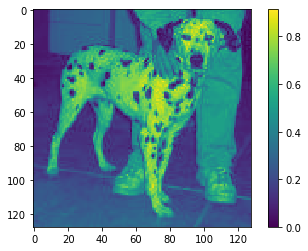

In [31]:
import numpy as np
import matplotlib.pyplot as plt
for i in X_test[:5]:
    plt.figure()
    plt.imshow(i)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [32]:
import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128,128)),
    keras.layers.Dense(254, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\HP\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
X = np.array(X_train)

In [35]:
model.fit(X,y_train,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 7.9439 - acc: 0.4900
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 8.0562 - acc: 0.4947
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 8.0562 - acc: 0.4947
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 8.0562 - acc: 0.4947
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 8.0562 - acc: 0.4947


In [36]:
X_test = np.array(X_test)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Test accuracy: 0.5159999995231629

Test loss: 7.716114669799805


In [38]:
predictions = model.predict(X_test)

In [39]:
predictions[0]

array([1.], dtype=float32)

In [43]:
if predictions[3]>0.5:
    print("Dog")
else:
    print("Cat")

Dog


In [44]:
if y_test[3]>0.5:
    print("Dog")
else:
    print("Cat")

Dog
